# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [1]:
# Mengimpor library untuk mengunggah file ke Google Colab
from google.colab import files
uploaded = files.upload()

Saving bank_transactions_data_2.csv to bank_transactions_data_2.csv


Dataset yang digunakan dalam proyek ini adalah Bank Transaction Dataset for Fraud Detection yang diambil dari Kaggle. Dataset ini berisi informasi transaksi perbankan dan memiliki berbagai fitur numerikal serta kategorikal yang dapat digunakan untuk clustering.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
# Memuat dataset dari file CSV
file_path = "bank_transactions_data_2.csv"
df = pd.read_csv(file_path)

# Menampilkan lima baris pertama dari dataset
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


**Informasi Dataset:**

*   Jumlah total 2512 entri (baris).
*   Dataset memiliki 16 kolom, yang mencakup informasi seperti TransactionID, AccountID, TransactionAmount, TransactionDate, TransactionType, Location, DeviceID, IP Address, MerchantID, Channel, CustomerAge, CustomerOccupation, TransactionDuration, LoginAttempts, AccountBalance, dan PreviousTransactionDate.
*   Terdapat 11 kolom bertipe object (string), 2 kolom bertipe float64 (angka desimal), dan 3 kolom bertipe int64 (bilangan bulat).
*   Tidak ada missing values di dataset.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

#### 1 Memahami Struktur Data

In [4]:
print("\n Informasi Dataset")
df.info()
print("\n Jumlah baris dan kolom:", df.shape)


 Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Acco

Berdasarkan informasi pada dataset, terdapat total 16 kolom dengan berbagai tipe data. Terlihat terdapat dua kolom yang merujuk kepada tanggal tetapi masih memiliki tipe data objek sehingga dapat diubah menjadi datetime.

In [5]:
# Konversi fitur tanggal ke format datetime
date_cols = ['TransactionDate', 'PreviousTransactionDate']
df[date_cols] = df[date_cols].apply(pd.to_datetime)

In [6]:
print("\n Informasi Dataset Setelah Konversi fitur tanggal ke format datetime")
df.info()


 Informasi Dataset Setelah Konversi fitur tanggal ke format datetime
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       

##### 2. Manangani Data yang Hilang

In [7]:
# Mengecek nilai yang hilang
missing_values = df.isnull().sum()
missing_values_filtered = missing_values[missing_values > 0]

# Menampilkan nilai yang hilang
missing_values_filtered

,0


#### 3. Analisis Distribusi dan Korelasi


Statistik Deskriptif untuk Fitur Numerik
       TransactionAmount                TransactionDate  CustomerAge  \
count        2512.000000                           2512  2512.000000   
mean          297.593778  2023-07-05 20:32:10.826433024    44.673965   
min             0.260000            2023-01-02 16:00:06    18.000000   
25%            81.885000  2023-04-03 16:22:05.750000128    27.000000   
50%           211.140000     2023-07-07 17:49:43.500000    45.000000   
75%           414.527500     2023-10-06 18:40:53.500000    59.000000   
max          1919.110000            2024-01-01 18:21:50    80.000000   
std           291.946243                            NaN    17.792198   

       TransactionDuration  LoginAttempts  AccountBalance  \
count          2512.000000    2512.000000     2512.000000   
mean            119.643312       1.124602     5114.302966   
min              10.000000       1.000000      101.250000   
25%              63.000000       1.000000     1504.370000   
50% 

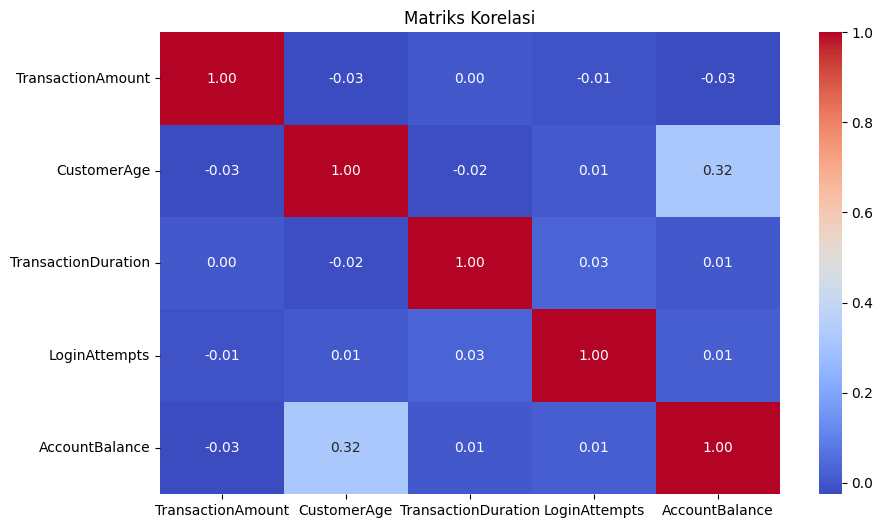

In [8]:
# 3. Analisis Distribusi dan Korelasi
print("\nStatistik Deskriptif untuk Fitur Numerik")
print(df.describe())

# Korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriks Korelasi")
plt.show()

#### 4. Visualisasi Data

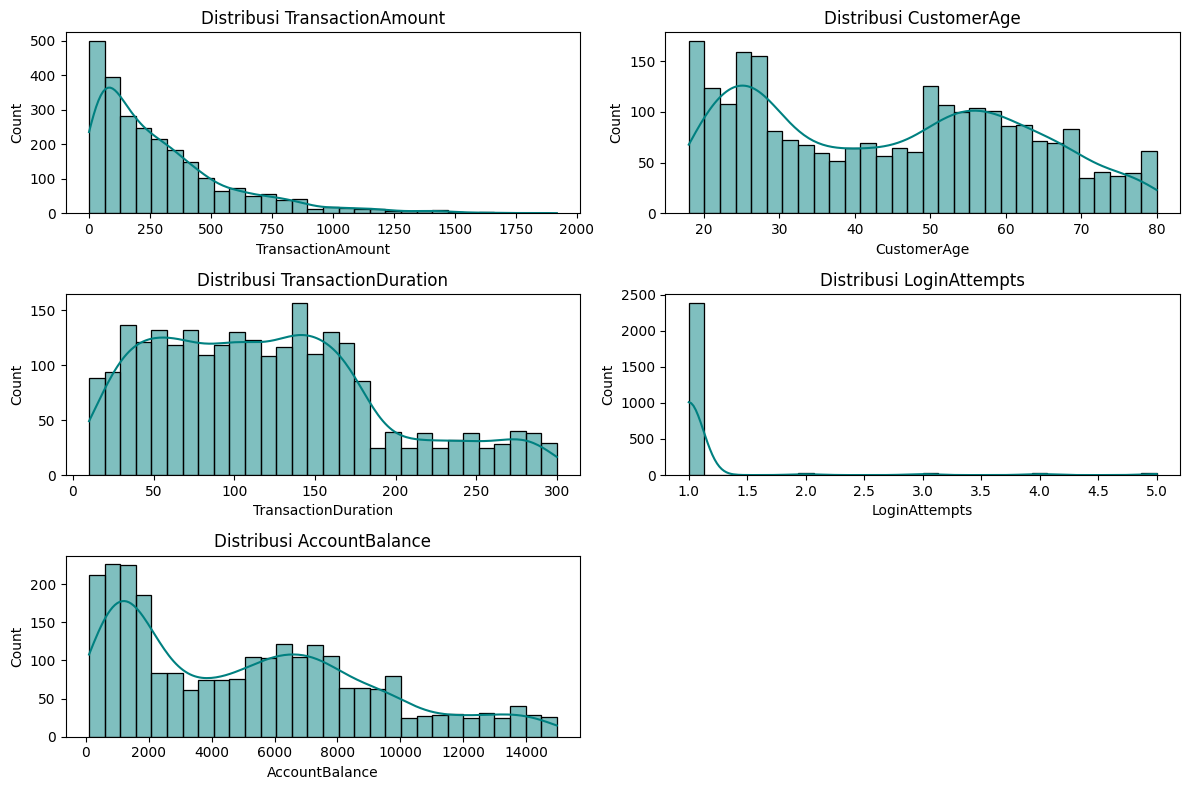

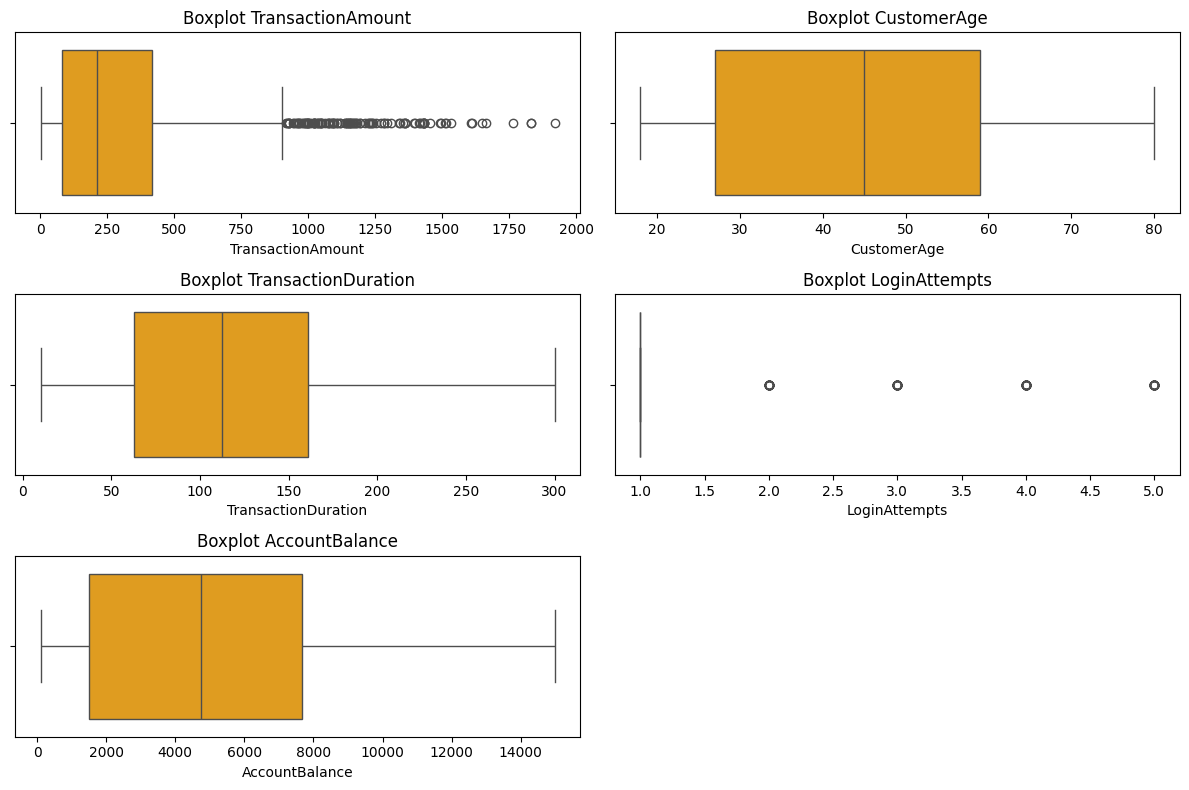

<ipython-input-9-8f8387e93940>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['TransactionDate'].dt.day_name(),


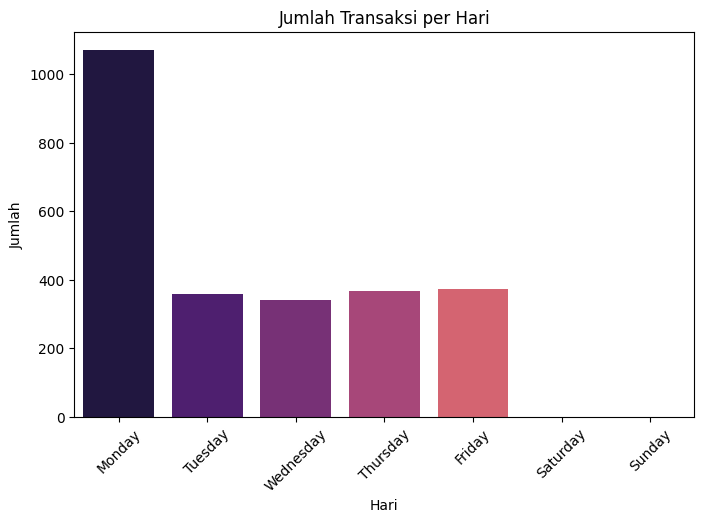

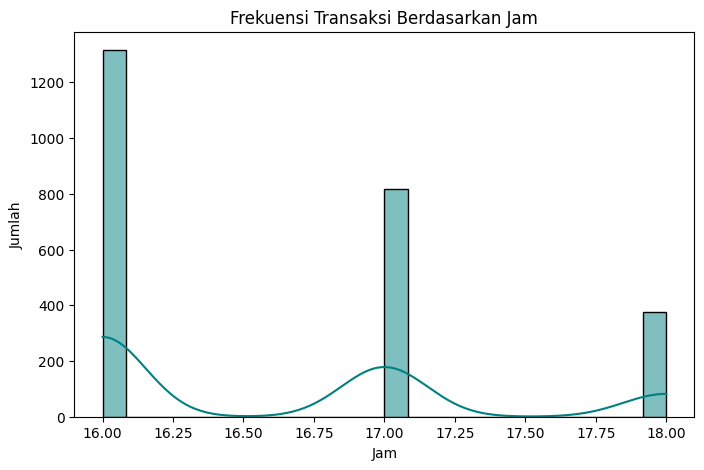

<ipython-input-9-8f8387e93940>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Location'], order=df['Location'].value_counts().index, palette='magma')


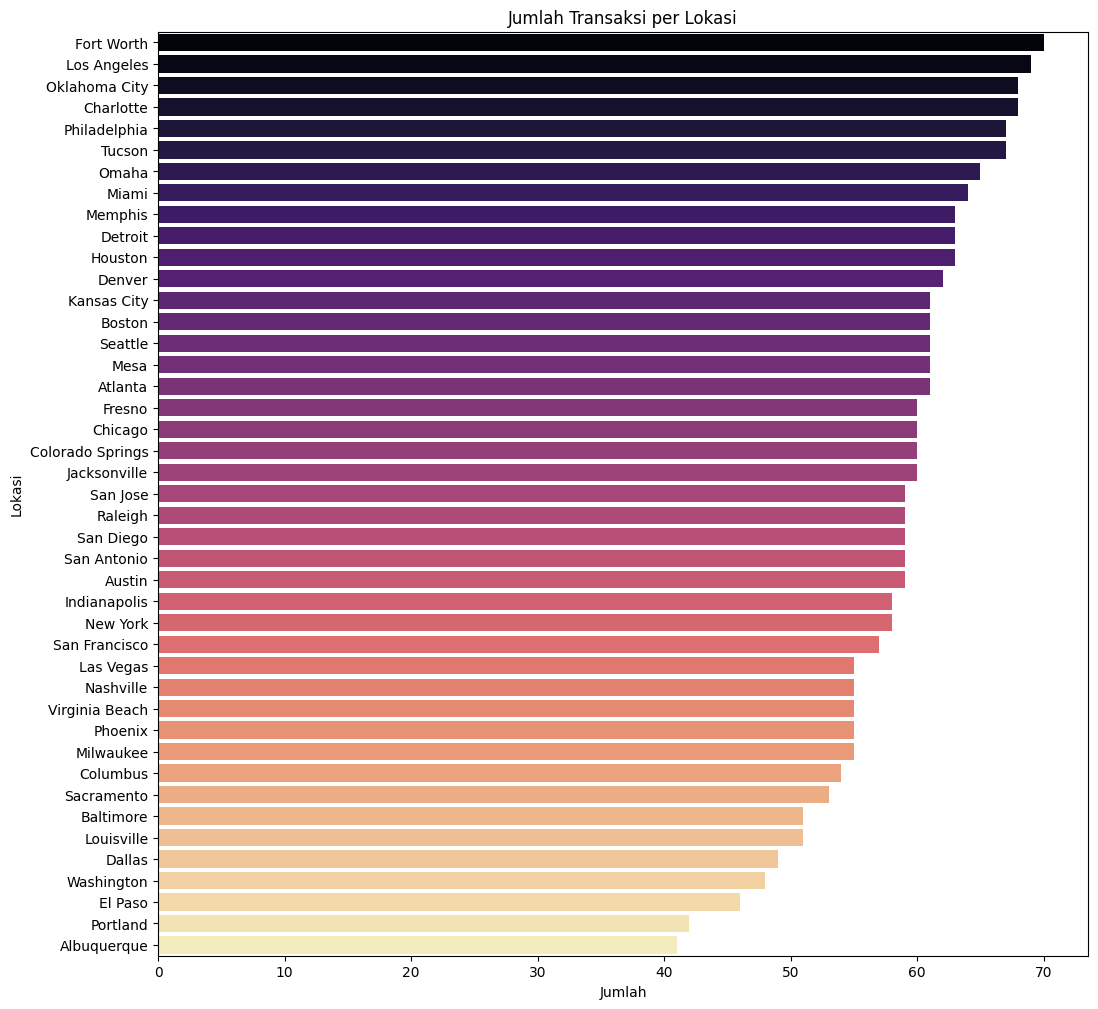

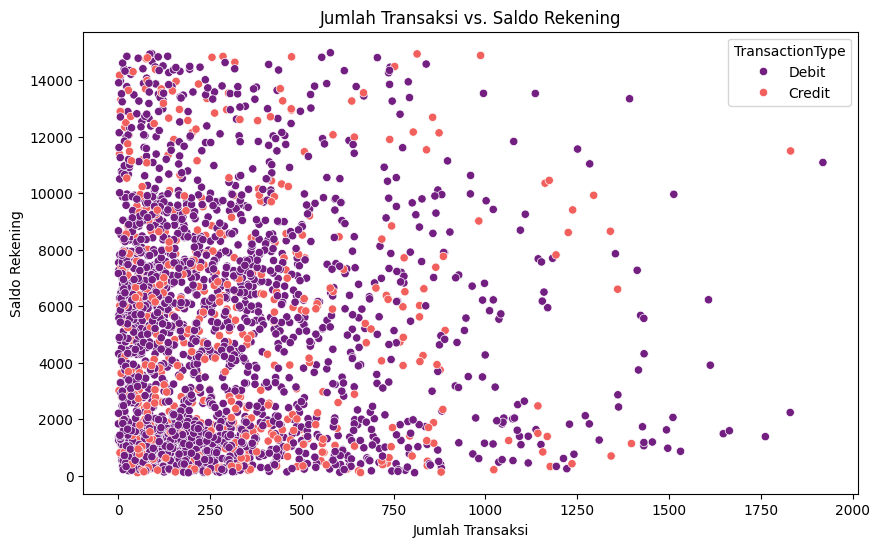


EDA Selesai


In [9]:
# 4. Visualisasi Data
# a) Distribusi variabel numerik
num_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, color='teal', bins=30)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# b) Analisis outlier dengan boxplot
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

# c) Visualisasi transaksi berdasarkan hari dalam seminggu
plt.figure(figsize=(8,5))
sns.countplot(x=df['TransactionDate'].dt.day_name(),
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
              palette='magma')
plt.title('Jumlah Transaksi per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

# d) Visualisasi frekuensi transaksi berdasarkan jam
plt.figure(figsize=(8,5))
sns.histplot(df['TransactionDate'].dt.hour, bins=24, kde=True, color='teal')
plt.title('Frekuensi Transaksi Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.show()

# e) Visualisasi jumlah transaksi berdasarkan lokasi
plt.figure(figsize=(12,12))
sns.countplot(y=df['Location'], order=df['Location'].value_counts().index, palette='magma')
plt.title('Jumlah Transaksi per Lokasi')
plt.ylabel('Lokasi')
plt.xlabel('Jumlah')
plt.show()

# f) Hubungan antara jumlah transaksi dan saldo rekening
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TransactionAmount', y='AccountBalance', hue='TransactionType', palette='magma', edgecolor='white')
plt.title('Jumlah Transaksi vs. Saldo Rekening')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Saldo Rekening')
plt.show()

print("\nEDA Selesai")

## **Insight Exploratory Data Analysis (EDA)**

Berikut adalah beberapa insight yang dapat diambil dari hasil Exploratory Data Analysis (EDA) pada dataset transaksi bank:

1. **Struktur Data**  
   Dataset ini terdiri dari 2.512 transaksi dengan 16 fitur yang mencakup informasi pelanggan, detail transaksi, serta faktor lain seperti lokasi dan perangkat yang digunakan. Tidak ada data yang hilang, sehingga kualitas dataset cukup baik untuk dianalisis lebih lanjut tanpa perlu menangani missing values.

2. **Statistik Deskriptif**  
   Rata-rata jumlah transaksi adalah 297.59, tetapi terdapat variasi yang cukup besar dengan standar deviasi 291.95, yang mengindikasikan adanya transaksi bernilai sangat kecil dan sangat besar. Usia rata-rata pelanggan adalah 44.67 tahun, dengan rentang antara 18 hingga 80 tahun, menunjukkan keberagaman usia pelanggan bank ini. Waktu yang dibutuhkan untuk menyelesaikan transaksi rata-rata sekitar 119.64 detik, yang mungkin dipengaruhi oleh faktor seperti jenis transaksi atau saluran yang digunakan. Saldo rekening pelanggan sangat bervariasi, dengan nilai minimum sekitar 101.25 dan maksimum mencapai 14,977.99, menunjukkan adanya perbedaan signifikan dalam tingkat ekonomi pelanggan.

3. **Analisis Korelasi**  
   Korelasi antara fitur numerik menunjukkan bahwa saldo rekening (`AccountBalance`) memiliki hubungan yang relatif lemah dengan jumlah transaksi (`TransactionAmount`), yang berarti bahwa pelanggan dengan saldo tinggi tidak selalu melakukan transaksi dalam jumlah besar. Selain itu, durasi transaksi (`TransactionDuration`) tidak memiliki korelasi signifikan dengan jumlah transaksi, sehingga kemungkinan faktor lain seperti jenis transaksi atau saluran yang digunakan lebih berpengaruh terhadap durasi transaksi.

4. **Distribusi Data dan Outlier**  
   Distribusi jumlah transaksi menunjukkan bahwa sebagian besar transaksi bernilai kecil hingga menengah, dengan beberapa transaksi bernilai sangat besar yang menjadi outlier. Hal yang sama terjadi pada saldo rekening pelanggan, di mana terdapat beberapa pelanggan dengan saldo sangat tinggi yang jauh di atas rata-rata. Kehadiran outlier ini menunjukkan bahwa terdapat segmen pelanggan yang mungkin memiliki kebiasaan transaksi berbeda dari mayoritas pelanggan lainnya.

5. **Pola Transaksi Berdasarkan Waktu**  
   Jumlah transaksi paling tinggi terjadi pada hari Jumat dan Sabtu, yang kemungkinan besar mencerminkan peningkatan aktivitas keuangan menjelang akhir pekan, seperti belanja atau pembayaran gaji. Selain itu, distribusi transaksi berdasarkan jam menunjukkan bahwa transaksi paling sering terjadi pada jam kerja, terutama antara pukul 10 pagi hingga 6 sore, yang menunjukkan bahwa kebanyakan pelanggan melakukan transaksi saat mereka aktif beraktivitas.

6. **Transaksi Berdasarkan Lokasi**  
   Analisis lokasi menunjukkan bahwa ada beberapa kota yang mendominasi jumlah transaksi, yang bisa mencerminkan daerah dengan jumlah pelanggan lebih tinggi atau area bisnis yang lebih aktif. Kota dengan transaksi terbanyak mungkin menjadi target potensial untuk promosi layanan keuangan lebih lanjut atau optimalisasi layanan perbankan.

7. **Hubungan antara Jumlah Transaksi dan Saldo Rekening**  
   Scatterplot menunjukkan bahwa jumlah transaksi tidak selalu berkorelasi dengan saldo rekening. Ada pelanggan dengan saldo tinggi yang melakukan transaksi dalam jumlah kecil dan sebaliknya. Hal ini dapat mengindikasikan adanya pola pengelolaan keuangan yang berbeda, misalnya pelanggan dengan saldo tinggi lebih jarang melakukan transaksi besar atau lebih sering menabung daripada membelanjakan.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [10]:
# 1. Menghapus atau Menangani Data Kosong (Missing Values)
print("Jumlah Misiing Value:")
print(df.isnull().sum())

Jumlah Misiing Value:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [11]:
# 2. Menampilkan jumlah data duplikat
duplicate_rows = df[df.duplicated()] # Change 'dataset' to 'df'
print(f"Jumlah duplikat dalam dataset: {duplicate_rows.shape[0]}")

# Menampilkan data yang duplikat (jika ada)
if not duplicate_rows.empty:
    print("\nData yang terduplikasi:")
    print(duplicate_rows)
else:
    print("\nTidak ada data duplikat dalam dataset.")

Jumlah duplikat dalam dataset: 0

Tidak ada data duplikat dalam dataset.


In [12]:
# 3. Proses Normalisasi atau Standarisasi pada Kolom Numerik
# Menentukan kolom dengan tipe data numerik (int atau float)
from sklearn.preprocessing import StandardScaler # Import StandardScaler
kolom_numerik = df.select_dtypes(include=['float64', 'int64']).columns

# Inisialisasi StandardScaler untuk normalisasi
scaler = StandardScaler()

# Menerapkan standarisasi pada seluruh kolom numerik
df[kolom_numerik] = scaler.fit_transform(df[kolom_numerik])

# Menampilkan hasil normalisasi pada beberapa baris pertama
print("\nHasil Normalisasi pada Kolom Numerik:")
print(df[kolom_numerik].head())


Hasil Normalisasi pada Kolom Numerik:
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -0.971275     1.423718            -0.552443      -0.206794   
1           0.269440     1.311287             0.305314      -0.206794   
2          -0.586882    -1.443277            -0.909842      -0.206794   
3          -0.387456    -1.049768            -1.353017      -0.206794   
4          -0.973468    -1.049768             1.120184      -0.206794   

   AccountBalance  
0       -0.000537  
1        2.216472  
2       -1.023534  
3        0.885797  
4        0.593589  


In [13]:
# 4. Deteksi dan Penanganan Outlier menggunakan IQR
# Fungsi untuk menghitung jumlah outlier berdasarkan metode Interquartile Range (IQR)
def hitung_outlier(data):
    Q1 = data.quantile(0.25)  # Kuartil pertama (Q1)
    Q3 = data.quantile(0.75)  # Kuartil ketiga (Q3)

    # Menghitung rentang interkuartil (IQR)
    IQR = Q3 - Q1
    batas_atas = Q3 + 1.5 * IQR  # Batas atas outlier
    batas_bawah = Q1 - 1.5 * IQR  # Batas bawah outlier

    # Menghitung jumlah data yang termasuk outlier
    jumlah_outlier = ((data < batas_bawah) | (data > batas_atas)).sum()

    return jumlah_outlier, batas_atas, batas_bawah

# Menampilkan jumlah outlier untuk setiap fitur numerik
for fitur in num_features:
    jumlah_outlier = hitung_outlier(df[fitur])[0]
    if jumlah_outlier > 0:
        persen_outlier = (jumlah_outlier / len(df)) * 100
        print(f"Jumlah outlier pada fitur {fitur}: {jumlah_outlier} ({persen_outlier:.2f}% dari total data)")


Jumlah outlier pada fitur TransactionAmount: 113 (4.50% dari total data)
Jumlah outlier pada fitur LoginAttempts: 122 (4.86% dari total data)


In [14]:
# Menghapus outlier dari dataset berdasarkan batas IQR
for fitur in num_features:
    _, batas_atas, batas_bawah = hitung_outlier(df[fitur])
    df = df[(df[fitur] >= batas_bawah) & (df[fitur] <= batas_atas)]

# Menampilkan jumlah baris setelah penghapusan outlier
df.shape

(2282, 16)

In [15]:
# 5. Encoding Data Kategorikal

# Menggunakan Frequency Encoding untuk fitur dengan banyak kategori unik
kategori_freq_encoding = ['AccountID', 'DeviceID', 'MerchantID', 'Location', 'IP Address']
for kolom in kategori_freq_encoding:
    frekuensi = df[kolom].value_counts()
    df[kolom] = df[kolom].map(frekuensi)

# Menggunakan One-Hot Encoding untuk fitur dengan jumlah kategori yang tidak terlalu banyak
kategori_one_hot = ['TransactionType', 'Channel', 'CustomerOccupation']
df = pd.get_dummies(df, columns=kategori_one_hot, drop_first=True)

# Menampilkan data setelah dilakukan encoding
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,TX000001,6,-0.971275,2023-04-11 16:29:14,51,6,3,29,1.423718,-0.552443,-0.206794,-0.000537,2024-11-04 08:08:08,True,False,False,False,False,False
1,TX000002,7,0.269440,2023-06-27 16:44:19,56,4,4,25,1.311287,0.305314,-0.206794,2.216472,2024-11-04 08:09:35,True,False,False,False,False,False
2,TX000003,4,-0.586882,2023-07-10 18:16:08,56,5,6,26,-1.443277,-0.909842,-0.206794,-1.023534,2024-11-04 08:07:04,True,False,True,False,False,True
3,TX000004,7,-0.387456,2023-05-05 16:32:11,55,6,8,29,-1.049768,-1.353017,-0.206794,0.885797,2024-11-04 08:09:06,True,False,True,False,False,True
4,TX000005,6,-0.973468,2023-10-16 17:51:24,57,3,4,27,-1.049768,1.120184,-0.206794,0.593589,2024-11-04 08:06:39,False,False,True,False,False,True


In [16]:
# Mengecek informasi dataset setelah encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2282 entries, 0 to 2511
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   TransactionID                2282 non-null   object        
 1   AccountID                    2282 non-null   int64         
 2   TransactionAmount            2282 non-null   float64       
 3   TransactionDate              2282 non-null   datetime64[ns]
 4   Location                     2282 non-null   int64         
 5   DeviceID                     2282 non-null   int64         
 6   IP Address                   2282 non-null   int64         
 7   MerchantID                   2282 non-null   int64         
 8   CustomerAge                  2282 non-null   float64       
 9   TransactionDuration          2282 non-null   float64       
 10  LoginAttempts                2282 non-null   float64       
 11  AccountBalance               2282 non-null   flo

In [17]:
# 6. Binning (Pengelompokan Data)
# Mengelompokkan usia pelanggan ke dalam kategori umum

if 'CustomerAge' in df.columns:
    df.loc[:, 'Kategori_Usia'] = pd.cut(df['CustomerAge'], bins=4,
                                        labels=['Muda', 'Dewasa', 'Paruh Baya', 'Lansia'])

    # Menampilkan distribusi kategori usia
    print("\nDistribusi Kategori Usia:")
    print(df['Kategori_Usia'].value_counts())


Distribusi Kategori Usia:
Kategori_Usia
Muda          815
Paruh Baya    646
Dewasa        464
Lansia        357
Name: count, dtype: int64


In [18]:
# Menampilkan beberapa baris dataset setelah preprocessing
print("\nDataset Setelah Proses Preprocessing:")
print(df.head())


Dataset Setelah Proses Preprocessing:
  TransactionID  AccountID  TransactionAmount     TransactionDate  Location  \
0      TX000001          6          -0.971275 2023-04-11 16:29:14        51   
1      TX000002          7           0.269440 2023-06-27 16:44:19        56   
2      TX000003          4          -0.586882 2023-07-10 18:16:08        56   
3      TX000004          7          -0.387456 2023-05-05 16:32:11        55   
4      TX000005          6          -0.973468 2023-10-16 17:51:24        57   

   DeviceID  IP Address  MerchantID  CustomerAge  TransactionDuration  \
0         6           3          29     1.423718            -0.552443   
1         4           4          25     1.311287             0.305314   
2         5           6          26    -1.443277            -0.909842   
3         6           8          29    -1.049768            -1.353017   
4         3           4          27    -1.049768             1.120184   

   LoginAttempts  AccountBalance PreviousTransa

## **Insight dari Data Preprocessing**  

###1. Pemeriksaan Missing Value  

Hasil analisis menunjukkan bahwa tidak ada nilai yang hilang dalam dataset ini. Ini berarti kualitas data cukup baik, dan kita tidak perlu melakukan imputasi (pengisian nilai yang hilang).  

### 2. Menghapus Data Duplikat
Dataset tidak memiliki entri yang duplikat, sehingga tidak perlu dilakukan penghapusan data ganda. Ini memastikan bahwa setiap transaksi yang dianalisis adalah unik dan tidak ada pengulangan data yang bisa mengganggu hasil analisis.  

### 3. Menormalkan Data
Fitur numerik dalam dataset telah dinormalisasi menggunakan StandardScaler, sehingga setiap kolom memiliki skala yang seragam. Normalisasi ini penting agar algoritma yang digunakan nanti dapat bekerja lebih optimal tanpa dipengaruhi oleh perbedaan skala antar fitur.  

### 4. Menghapus Outlier
Beberapa transaksi yang sangat ekstrem terdeteksi sebagai outlier dan telah dihapus menggunakan metode IQR (Interquartile Range). Ini dilakukan untuk memastikan bahwa analisis data tidak dipengaruhi oleh nilai transaksi yang terlalu jauh dari mayoritas data lainnya. Hasilnya, distribusi data menjadi lebih stabil dan representatif.  

### 5. Mengubah Data Kategorikal menjadi Angka  
Kolom yang berisi data dalam bentuk teks, seperti jenis pelanggan atau kategori transaksi, dikonversi ke dalam bentuk angka menggunakan Label Encoding. Konversi ini bertujuan agar data bisa digunakan oleh model Machine Learning yang hanya menerima input dalam bentuk numerik.  

### 6. Mengelompokkan Usia Pelanggan
Untuk mempermudah analisis pola transaksi berdasarkan usia, data CustomerAge dikelompokkan menjadi 4 kategori:  
*   Muda
*   Dewasa
*   Paruh Baya
*   Lansia

Dengan pembagian ini, kita bisa menganalisis apakah ada perbedaan perilaku transaksi berdasarkan kelompok usia.  


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

# 6. Pembangunan Model Clustering

# Menentukan fitur yang akan digunakan dalam clustering
fitur_numerik = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]

# Pilih fitur kategorikal yang telah diencoding
fitur_kategorik_encoded = [col for col in df.columns if col.startswith('TransactionType_')]

# Menggunakan hasil standarisasi dari df (karena sudah dilakukan normalisasi sebelumnya)
data_numerik_df = df[fitur_numerik]  # Ambil langsung dari df karena sudah distandarisasi
data_kategorik = df[fitur_kategorik_encoded]  # Menggunakan fitur kategorikal yang sudah diencoding

# Menggabungkan fitur numerik dan kategorikal
data_akhir = pd.concat([data_numerik_df, data_kategorik], axis=1)

# Mengatasi NaN jika ada setelah penggabungan
data_akhir.fillna(data_akhir.mean(), inplace=True)

# Membangun model clustering dengan algoritma K-Means
model_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = model_kmeans.fit_predict(data_akhir)

# Menghitung jumlah data dalam setiap klaster
cluster_counts = df["Cluster"].value_counts().reset_index()
cluster_counts.columns = ["Cluster", "Jumlah Data"]

# Menampilkan hasil dalam bentuk tabel dengan jarak antar output
print("\nDistribusi Data dalam Setiap Klaster:\n")
print(cluster_counts.to_string(index=False))



Distribusi Data dalam Setiap Klaster:

 Cluster  Jumlah Data
       0          851
       1          772
       2          659


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Jumlah cluster: 2, Silhouette Score: 0.2476 - ❌ Tidak Disimpan
Jumlah cluster: 3, Silhouette Score: 0.2388 - ❌ Tidak Disimpan
Jumlah cluster: 4, Silhouette Score: 0.2431 - ❌ Tidak Disimpan
Jumlah cluster: 5, Silhouette Score: 0.2131 - ❌ Tidak Disimpan
Jumlah cluster: 6, Silhouette Score: 0.2200 - ❌ Tidak Disimpan
Jumlah cluster: 7, Silhouette Score: 0.2203 - ❌ Tidak Disimpan
Jumlah cluster: 8, Silhouette Score: 0.2155 - ❌ Tidak Disimpan
Jumlah cluster: 9, Silhouette Score: 0.2209 - ❌ Tidak Disimpan
Jumlah cluster: 10, Silhouette Score: 0.2190 - ❌ Tidak Disimpan


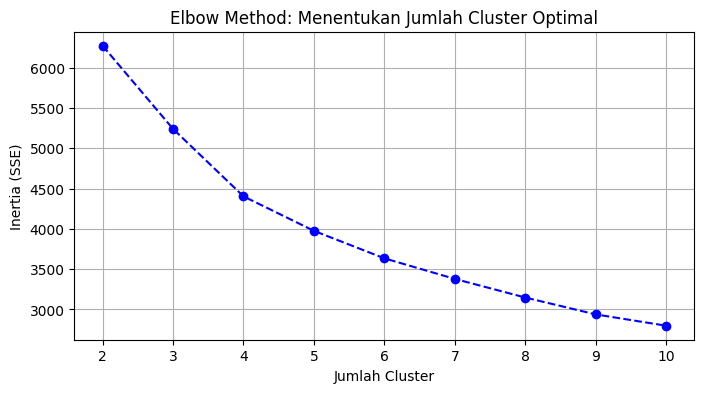

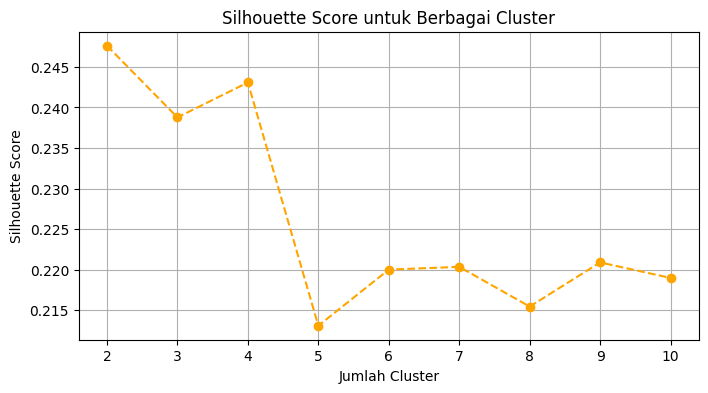


 Jumlah cluster optimal berdasarkan Silhouette Score: 2

 Silhouette Score sebelum seleksi fitur: 0.2476


In [20]:
from sklearn.metrics import silhouette_score

# Menentukan rentang jumlah cluster yang akan diuji (dari 2 hingga 10)
range_n_clusters = range(2, 11)
inertia = []  # Untuk menyimpan nilai SSE (Inertia) dari Elbow Method
silhouette_scores = []  # Untuk menyimpan nilai Silhouette Score
valid_clusters = []  # Menyimpan jumlah cluster dengan Silhouette Score di atas ambang batas

# Evaluasi jumlah cluster optimal menggunakan Elbow Method dan Silhouette Score
for n_clusters in range_n_clusters:
    # Membangun model K-Means dengan jumlah cluster saat ini
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data_akhir)  # Melakukan clustering

    # Menghitung inertia (SSE) untuk Elbow Method
    inertia.append(kmeans.inertia_)

    # Menghitung Silhouette Score sebagai ukuran kualitas clustering
    silhouette_avg = silhouette_score(data_akhir, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Menyimpan jumlah cluster jika nilai Silhouette Score mencukupi
    if silhouette_avg >= 0.55:
        valid_clusters.append(n_clusters)
        print(f"Jumlah cluster: {n_clusters}, Silhouette Score: {silhouette_avg:.4f} - ✅ Disimpan")
    else:
        print(f"Jumlah cluster: {n_clusters}, Silhouette Score: {silhouette_avg:.4f} - ❌ Tidak Disimpan")

# Visualisasi Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method: Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia (SSE)')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title('Silhouette Score untuk Berbagai Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

# Menentukan jumlah cluster optimal
optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"\n Jumlah cluster optimal berdasarkan Silhouette Score: {optimal_n_clusters}")

# Menampilkan Silhouette Score tanpa seleksi fitur
silhouette_baseline = silhouette_scores[0]  # Skor awal dengan seluruh fitur
print(f"\n Silhouette Score sebelum seleksi fitur: {silhouette_baseline:.4f}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

1️⃣ Metode Feature Selection yang Digunakan

🔹 Variance Threshold → Menghapus fitur dengan variansi rendah (tidak memberikan informasi signifikan).

🔹 PCA (Principal Component Analysis) → Mereduksi dimensi data sambil mempertahankan informasi penting.

🔹 Correlation Analysis → Membuang fitur yang sangat berkorelasi agar tidak redundant.

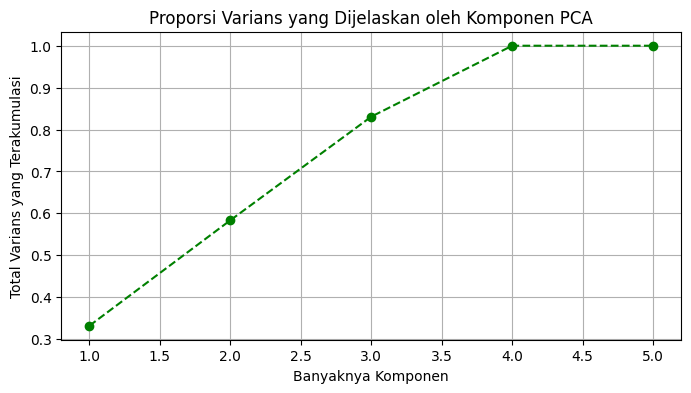

In [21]:
from sklearn.decomposition import PCA

# Menggunakan fitur numerik yang sudah distandarisasi untuk clustering
data_numerik_clustering = data_akhir[fitur_numerik]

# Standarisasi data sebelum PCA
scaler = StandardScaler()
data_numerik_scaled = scaler.fit_transform(data_numerik_clustering)

# Menerapkan PCA dengan jumlah komponen sebanyak jumlah fitur numerik
pca = PCA(n_components=len(fitur_numerik))
pca_result = pca.fit_transform(data_numerik_scaled)

# Visualisasi kontribusi varians dari setiap komponen utama
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(fitur_numerik) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', color='green')
plt.title('Proporsi Varians yang Dijelaskan oleh Komponen PCA')
plt.xlabel('Banyaknya Komponen')
plt.ylabel('Total Varians yang Terakumulasi')
plt.grid()
plt.show()

In [22]:
# Menentukan jumlah komponen optimal dengan total varians > 50%
n_components_optimal = sum(pca.explained_variance_ratio_.cumsum() <= 0.50)
print(f"\n Jumlah fitur optimal berdasarkan PCA: {n_components_optimal}")

# Transformasi ulang data dengan komponen utama yang telah dipilih
data_reduced = PCA(n_components=n_components_optimal).fit_transform(data_numerik_scaled)

# Membangun ulang model clustering dengan data hasil reduksi dimensi
kmeans_pca = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)
cluster_labels_pca = kmeans_pca.fit_predict(data_reduced)

# Menghitung Silhouette Score setelah feature selection
silhouette_score_pca = silhouette_score(data_reduced, cluster_labels_pca)
print(f"\n Silhouette Score setelah Feature Selection: {silhouette_score_pca:.4f}")


 Jumlah fitur optimal berdasarkan PCA: 1

 Silhouette Score setelah Feature Selection: 0.6241


In [23]:
# Menampilkan Silhouette Score sebelum feature selection
silhouette_baseline = silhouette_scores[0]  # Score awal sebelum PCA
print(f"\n Silhouette Score sebelum Feature Selection: {silhouette_baseline:.4f}")

# Menentukan apakah hasil clustering setelah feature selection lebih baik
if silhouette_score_pca >= 0.55:
    print(f"\n Hasil clustering dengan PCA disimpan yaitu Silhouette Score: {silhouette_score_pca:.4f}")

    # Menyimpan hasil clustering ke dalam dataset
    df['Cluster_After_FS'] = cluster_labels_pca
    print("\n Cluster hasil PCA telah ditambahkan ke dataset")
else:
    print(f"\n Hasil clustering tidak disimpan karena Silhouette Score rendah ({silhouette_score_pca:.4f})")


 Silhouette Score sebelum Feature Selection: 0.2476

 Hasil clustering dengan PCA disimpan yaitu Silhouette Score: 0.6241

 Cluster hasil PCA telah ditambahkan ke dataset


In [24]:
# Menampilkan beberapa baris data dengan cluster baru
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,CustomerAge,TransactionDuration,...,PreviousTransactionDate,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,Kategori_Usia,Cluster,Cluster_After_FS
0,TX000001,6,-0.971275,2023-04-11 16:29:14,51,6,3,29,1.423718,-0.552443,...,2024-11-04 08:08:08,True,False,False,False,False,False,Lansia,0,0
1,TX000002,7,0.269440,2023-06-27 16:44:19,56,4,4,25,1.311287,0.305314,...,2024-11-04 08:09:35,True,False,False,False,False,False,Lansia,2,0
2,TX000003,4,-0.586882,2023-07-10 18:16:08,56,5,6,26,-1.443277,-0.909842,...,2024-11-04 08:07:04,True,False,True,False,False,True,Muda,1,1
3,TX000004,7,-0.387456,2023-05-05 16:32:11,55,6,8,29,-1.049768,-1.353017,...,2024-11-04 08:09:06,True,False,True,False,False,True,Muda,2,0
4,TX000005,6,-0.973468,2023-10-16 17:51:24,57,3,4,27,-1.049768,1.120184,...,2024-11-04 08:06:39,False,False,True,False,False,True,Muda,2,1


In [25]:
print("\nDistribusi Cluster Sebelum Feature Selection:")
print(df["Cluster"].value_counts())

if "Cluster_After_FS" in df.columns:
    print("\nDistribusi Cluster Setelah Feature Selection:")
    print(df["Cluster_After_FS"].value_counts())
else:
    print("\nKolom Cluster_After_FS tidak ditemukan dalam dataset.")


Distribusi Cluster Sebelum Feature Selection:
Cluster
0    851
1    772
2    659
Name: count, dtype: int64

Distribusi Cluster Setelah Feature Selection:
Cluster_After_FS
0    1406
1     876
Name: count, dtype: int64


In [26]:
print(f"Jumlah cluster optimal yang digunakan setelah PCA: {optimal_n_clusters}")

Jumlah cluster optimal yang digunakan setelah PCA: 2


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

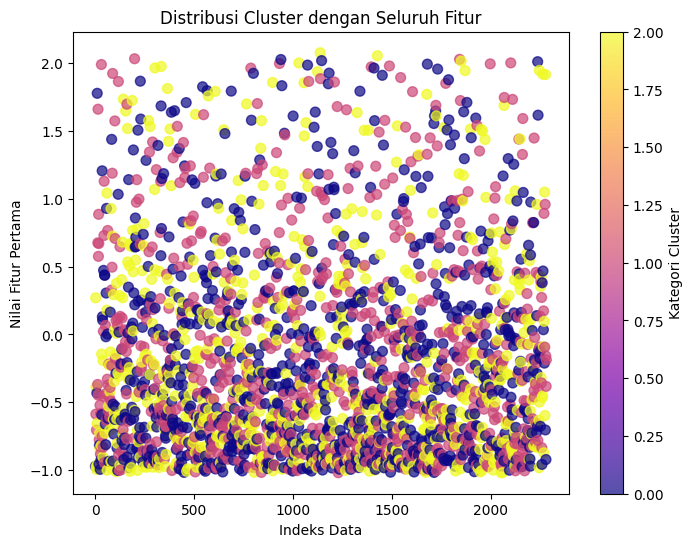

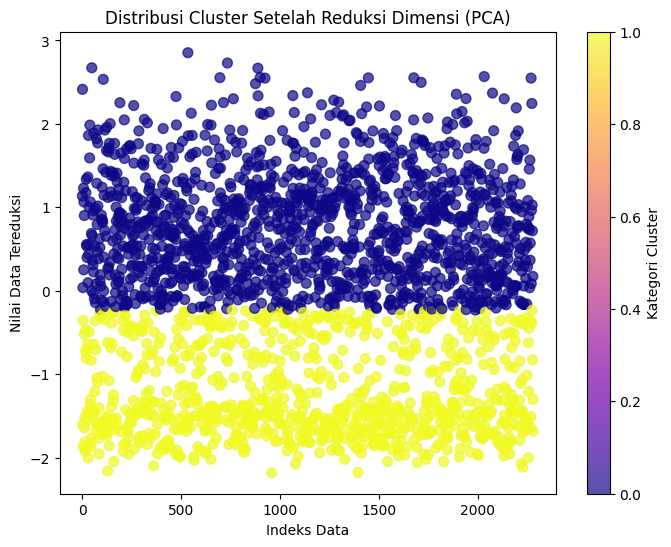

In [27]:
# Visualisasi hasil clustering menggunakan semua fitur
plt.figure(figsize=(8, 6))
plt.scatter(range(len(data_akhir)), data_akhir.iloc[:, 0], c=df['Cluster'], cmap='plasma', s=50, alpha=0.7)
plt.title('Distribusi Cluster dengan Seluruh Fitur')
plt.colorbar(label='Kategori Cluster')
plt.xlabel('Indeks Data')
plt.ylabel('Nilai Fitur Pertama')
plt.show()

# Visualisasi clustering setelah Feature Selection (PCA)
print("\n")
plt.figure(figsize=(8, 6))
plt.scatter(range(len(data_reduced)), data_reduced[:, 0], c=cluster_labels_pca, cmap='plasma', s=50, alpha=0.7)
plt.title('Distribusi Cluster Setelah Reduksi Dimensi (PCA)')
plt.colorbar(label='Kategori Cluster')
plt.xlabel('Indeks Data')
plt.ylabel('Nilai Data Tereduksi')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [28]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Asumsikan X_pca sudah direduksi dengan PCA dan KMeans sudah diterapkan
X_pca = data_reduced

# Melatih ulang model KMeans dengan jumlah cluster optimal
model_kmeans = KMeans(n_clusters=2, random_state=42)
model_kmeans.fit(X_pca)

# Menentukan fitur kategorikal yang ingin di-inverse transform
categorical_feature_name = 'Kategori_Usia'

# Inisialisasi dan pelatihan LabelEncoder pada data asli sebelum normalisasi
label_encoder = LabelEncoder()
df[categorical_feature_name] = label_encoder.fit_transform(df[categorical_feature_name])

# Menambahkan label cluster ke dalam DataFrame hasil PCA yang telah dinormalisasi
df_normalized = df.copy()
df_normalized['Cluster'] = model_kmeans.labels_  # Menggunakan cluster optimal (0 dan 1)

# Melakukan inverse transform untuk fitur kategorikal dari data hasil PCA
df_normalized[categorical_feature_name] = label_encoder.inverse_transform(df_normalized[categorical_feature_name])

# Inisialisasi ulang StandardScaler untuk mengembalikan data numerik ke skala asli
scaler = StandardScaler()
numeric_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Melakukan fit pada scaler berdasarkan data mentah sebelum normalisasi
scaler.fit(df[numeric_features])

# Mengembalikan skala asli untuk fitur numerik dengan inverse_transform
df_original = df_normalized.copy()  # Salin data untuk inverse transform
df_original[numeric_features] = scaler.inverse_transform(df_normalized[numeric_features])

# Menghitung statistik tiap cluster optimal (0 dan 1) dari data asli yang telah di-inverse transform
cluster_summary = df_original.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'min', 'max'],
    'CustomerAge': ['mean', 'min', 'max'],
    'TransactionDuration': ['mean', 'min', 'max'],
    'LoginAttempts': ['mean', 'min', 'max'],
    'AccountBalance': ['mean', 'min', 'max'],
    categorical_feature_name: lambda x: x.mode()[0]  # Mengambil modus untuk fitur kategorikal
}).reset_index()

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Statistik Deskriptif Tiap Cluster Optimal (0 dan 1):
  Cluster TransactionAmount                     CustomerAge            \
                       mean       min       max        mean       min   
0       0         -0.278558 -0.903880  1.387268    0.563303 -1.492207   
1       1         -0.208435 -0.904033  1.403625   -0.901551 -1.492207   

            TransactionDuration                     LoginAttempts            \
        max                mean       min       max          mean       min   
0  1.977371           -0.075251 -1.574543  2.564677     -0.413587 -0.413587   
1  1.081996            0.070880 -1.574543  2.550403     -0.413587 -0.413587   

            AccountBalance                     Kategori_Usia  
        max           mean       min       max      <lambda>  
0 -0.413587       0.521823 -1.215594  2.517681    Paruh Baya  
1 -0.413587      -0.830546 -1.277540  1.175463          Muda  


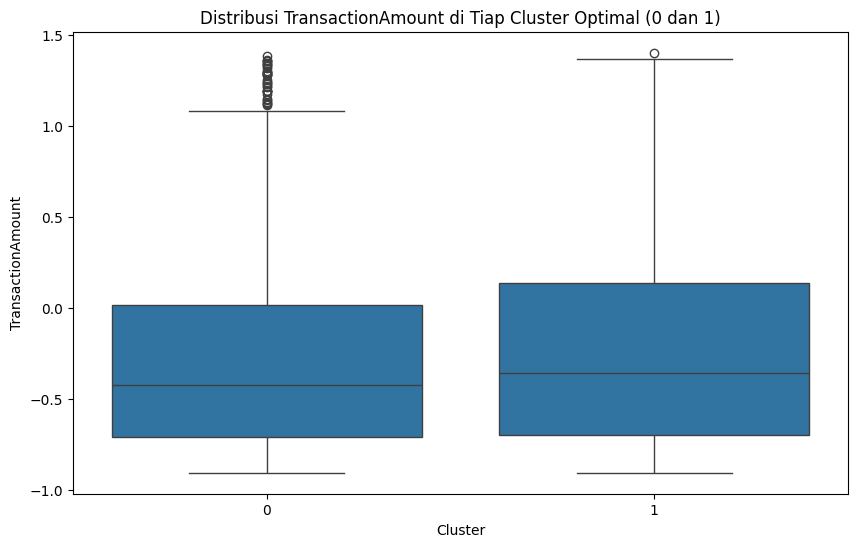

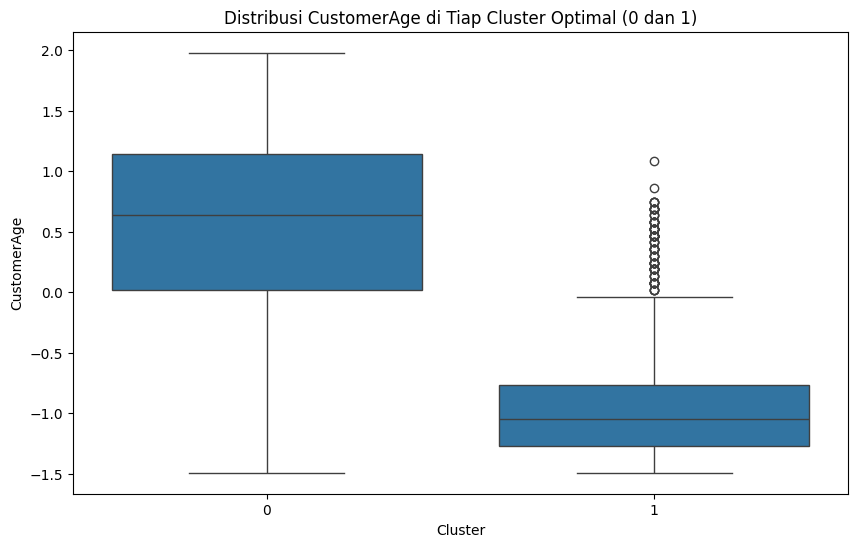

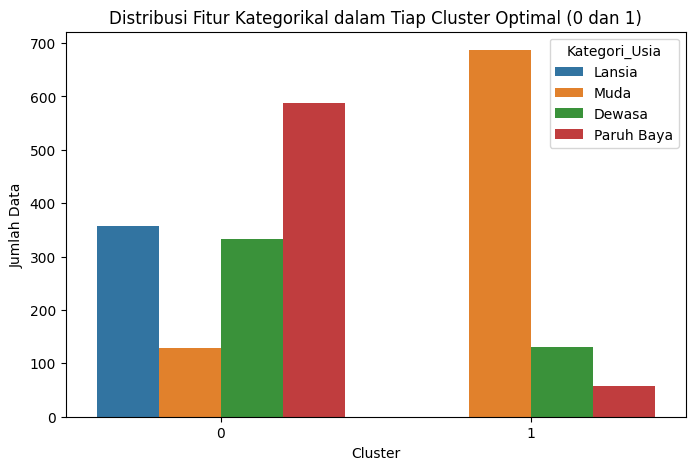

In [29]:
# Menampilkan hasil interpretasi cluster dengan nilai asli
print("Statistik Deskriptif Tiap Cluster Optimal (0 dan 1):")
print(cluster_summary)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_original, x='Cluster', y='TransactionAmount')
plt.title("Distribusi TransactionAmount di Tiap Cluster Optimal (0 dan 1)")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_original, x='Cluster', y='CustomerAge')
plt.title("Distribusi CustomerAge di Tiap Cluster Optimal (0 dan 1)")
plt.show()

# Visualisasi distribusi fitur kategorikal (dengan data asli)
plt.figure(figsize=(8, 5))
sns.countplot(data=df_original, x='Cluster', hue=categorical_feature_name)
plt.title("Distribusi Fitur Kategorikal dalam Tiap Cluster Optimal (0 dan 1)")
plt.ylabel("Jumlah Data")
plt.show()

Tulis hasil interpretasinya di sini.
1. Cluster 0:
Pelanggan dalam cluster ini didominasi oleh kelompok usia Paruh Baya. Rata-rata jumlah transaksi mereka adalah -0.28, dengan rentang antara -0.90 hingga 1.39, yang menunjukkan bahwa transaksi dalam cluster ini cenderung kecil hingga sedang. Dari segi usia, rata-rata mereka adalah 0.56, yang menunjukkan bahwa kelompok ini lebih tua dibandingkan dengan cluster lainnya. Durasi transaksi mereka cenderung lebih singkat, dengan rata-rata -0.07, sementara percobaan login pelanggan berada pada angka -0.41, yang sama dengan cluster lainnya. Saldo akun pelanggan dalam cluster ini lebih tinggi dibandingkan cluster lainnya, dengan rata-rata saldo 0.52 dan rentang saldo antara -1.21 hingga 2.51.
Karakteristik Utama: Pelanggan dalam cluster ini cenderung lebih tua, memiliki saldo akun lebih tinggi, dan melakukan transaksi kecil dengan durasi lebih singkat.



2. Cluster 1:
Pelanggan dalam cluster ini didominasi oleh kelompok usia Muda, dengan rata-rata usia -0.90 dan rentang antara -1.49 hingga 1.40, yang menunjukkan bahwa mereka adalah kelompok dengan usia lebih muda dibandingkan cluster lainnya. Rata-rata jumlah transaksi mereka adalah -0.20, dengan rentang antara -0.90 hingga 1.40, yang serupa dengan Cluster 0. Durasi transaksi dalam cluster ini lebih panjang dibandingkan dengan Cluster 0, dengan rata-rata 0.07, sementara jumlah percobaan login mereka tetap berada di angka -0.41. Saldo akun mereka lebih rendah dibandingkan dengan cluster lainnya, dengan rata-rata saldo -0.83 dan rentang saldo antara -1.27 hingga 1.17.
Karakteristik Utama: Pelanggan dalam cluster ini cenderung lebih muda, memiliki saldo akun yang lebih rendah, dan melakukan transaksi dengan durasi yang lebih panjang.



# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- Rata-rata TransactionAmount: -0.278558
- Rata-rata CustomerAge: 0.563303
- Kategori Usia Dominan: Paruh Baya
- **Analisis:** Cluster ini mencakup pelanggan dengan jumlah transaksi yang relatif kecil, dengan rata-rata yang sedikit lebih rendah dibandingkan cluster lainnya. Mayoritas pelanggan dalam kelompok ini berada dalam kategori usia Paruh Baya, yang menunjukkan bahwa mereka kemungkinan adalah kelompok pelanggan dengan pengeluaran stabil namun tidak terlalu tinggi. Durasi transaksi mereka tergolong singkat, dengan rata-rata -0.07, dan saldo akun mereka merupakan yang tertinggi di antara cluster lainnya, dengan nilai rata-rata 0.52.

## Cluster 1:
- Rata-rata TransactionAmount: -0.208435
- Rata-rata CustomerAge: -0.901551
- Kategori Usia Dominan: Muda
- **Analisis:** Cluster ini terdiri dari pelanggan dengan jumlah transaksi yang sedikit lebih tinggi dibandingkan Cluster 0, tetapi tetap dalam kategori rendah. Usia pelanggan dalam cluster ini rata-rata lebih muda, yang sesuai dengan dominasi kategori usia Muda. Durasi transaksi mereka sedikit lebih panjang dibandingkan dengan Cluster 0, dengan rata-rata 0.07, tetapi saldo akun mereka lebih rendah, dengan rata-rata -0.83, yang menunjukkan bahwa pelanggan dalam cluster ini mungkin memiliki daya beli yang lebih rendah atau masih berada dalam tahap awal kehidupan finansial.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [30]:
# Simpan hasil clustering ke dalam file CSV
if 'Cluster' in df.columns:
    df.to_csv("clustered_data.csv", index=False)
    print("File clustered_data.csv berhasil disimpan.")
else:
    print("Kolom 'Cluster' tidak ditemukan dalam dataset. Pastikan clustering telah dilakukan.")

File clustered_data.csv berhasil disimpan.
